<a href="https://colab.research.google.com/github/harshsamoliya/BasicCNN/blob/main/SimpleCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

# particular file for library fashion_mnist -> load_data()
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


import matplotlib.pyplot as plt
# plt.imshow(x_train[0],cmap='hot')
# plt.axis('off')
# plt.show()


# Image is Flatten -> image are in single dimensions

x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000,28,28,1)

#
class_name = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
from tensorflow.keras.utils import to_categorical # One Hot-Encoding //

y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

# Construction of basic simple CNN #
# Below Steps #

model = Sequential()
# Convolutional layer
model.add(Conv2D(filters = 32,kernel_size =(4,4),input_shape = (28,28,1),activation='relu'))
# Max Pooling
model.add(MaxPool2D(pool_size=(2,2)))
# Flatten
model.add(Flatten())
# Dense Layers
model.add(Dense(128,activation='relu'))
# Output Layer
model.add(Dense(10,activation='softmax'))
# Compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(x_train,y_cat_train,epochs=5)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5514 - accuracy: 0.8053
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2946 - accuracy: 0.8947
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2381 - accuracy: 0.9100
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2042 - accuracy: 0.9254
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1787 - accuracy: 0.9339


[6]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


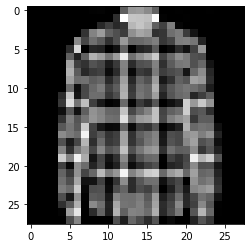

Shirt


In [ ]:
i = 7
result = model.predict_classes(x_test[i].reshape(1,28,28,1))
print(result)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.show()
print(class_name[result[0]])

